## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf 
from tensorflow import keras
from keras import layers 
from keras import callbacks
from sklearn.compose import make_column_transformer 
from sklearn.model_selection import ShuffleSplit, train_test_split 
from sklearn.utils import shuffle

2025-04-23 17:16:03.405032: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-23 17:16:03.405158: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-23 17:16:03.407389: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-23 17:16:03.418272: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-23 17:16:04.774627: W tensorflow/compiler/tf2

## Data Import

In [2]:
LineData = pd.read_csv("../Data/DataLine1.csv")
# LineData = pd.read_csv("../Data/DataLine2.csv")
# LineData = pd.read_csv("../Data/DataLine3.csv") 

# Shuffling
LineData_suffled = shuffle(LineData, random_state = 2)
LineData_suffled.head()

,Distance,LG,LL,LLG,LLL,Ia,Ib,Ic,Va,Vb,Vc
331,70,0,1,0,0,723.33,1066.90,958.17,36367,34584,35189
84,10,0,0,0,1,2611.00,2611.00,2611.00,29483,29483,29483
436,65,0,0,1,0,729.26,890.22,923.07,36331,35556,35364
394,85,0,1,0,0,723.38,889.27,831.72,36365,35505,35769
161,85,0,0,0,1,810.51,810.51,810.51,35907,35906,35907


## Feature Selection

In [3]:
features_col = ["Ia", "Ib", "Ic", "Va", "Vb", "Vc"] 
target_col = ["Distance"]
X = LineData_suffled[features_col] 
Y = LineData_suffled[target_col] 

## Feature Normalization

In [4]:
scalling = StandardScaler()
X_scalled = scalling.fit_transform(X, Y) 

## Dataset Splitting 

In [5]:
x_train, x_val, y_train, y_val  = train_test_split(X_scalled, Y, test_size=0.15, random_state=10) 

## Model Design

In [6]:
Dis_model = keras.Sequential([
    layers.Dense(60, activation='relu', input_shape=[6]), 
    layers.BatchNormalization(),
    layers.Dense(100, activation='tanh'), 
    layers.BatchNormalization(),
    layers.Dense(80, activation='relu'),
    layers.BatchNormalization(),  
    layers.Dense(80, activation='relu'), 
    layers.Dense(1) 
])


Dis_model.compile(
    optimizer = 'adam',
    loss = 'mae',
)

2025-04-23 17:16:26.408656: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


## Training

In [7]:
history = Dis_model.fit(
    x_train, y_train,
    validation_data = (x_val, y_val),
    batch_size = 120,  
    epochs = 1000,
)

Epoch 1/1000
4/4 [==============================] - 2s 158ms/step - loss: 50.0465 - val_loss: 48.5249
Epoch 2/1000
4/4 [==============================] - 0s 58ms/step - loss: 48.7516 - val_loss: 48.4093
Epoch 3/1000
4/4 [==============================] - 0s 60ms/step - loss: 47.7768 - val_loss: 48.2620
Epoch 4/1000
4/4 [==============================] - 0s 105ms/step - loss: 46.9006 - val_loss: 48.0879
Epoch 5/1000
4/4 [==============================] - 0s 102ms/step - loss: 46.0717 - val_loss: 47.8981
Epoch 6/1000
4/4 [==============================] - 0s 92ms/step - loss: 45.1815 - val_loss: 47.6835
Epoch 7/1000
4/4 [==============================] - 0s 118ms/step - loss: 44.2822 - val_loss: 47.4345
Epoch 8/1000
4/4 [==============================] - 0s 143ms/step - loss: 43.2949 - val_loss: 47.1595
Epoch 9/1000
4/4 [==============================] - 0s 111ms/step - loss: 42.2361 - val_loss: 46.8737
Epoch 10/1000
4/4 [==============================] - 0s 108ms/step - loss: 41.1209 - 

## Training History

Minimum Train Loss: 1.1411678791046143
Minimum Validation Loss: 0.949563205242157


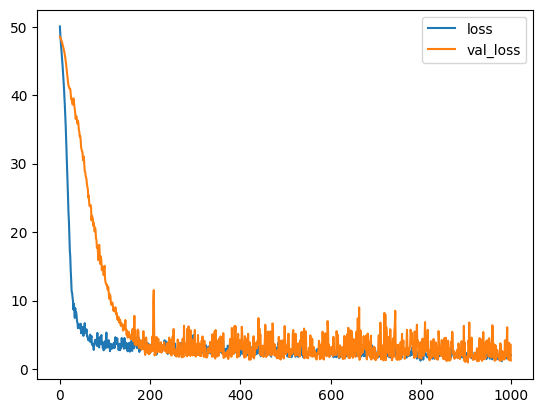

In [8]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Train Loss: {}".format(history_df['loss'].min()))
print("Minimum Validation Loss: {}".format(history_df['val_loss'].min()))

## Prediction on Validation Data

In [9]:

y_pred = Dis_model.predict(x_val)
y_val_series = y_val.squeeze()
y_pred_series = y_pred.squeeze()
comparison = pd.DataFrame({
    "True": np.array(y_val_series), 
    "Predicted": np.array(y_pred_series)  
})

3/3 [==============================] - 0s 8ms/step


In [10]:
# Showing the True values and Predicted values on Validation data
comparison.head()

,True,Predicted
0,40,38.236965
1,80,80.585686
2,40,38.330288
3,45,44.604877
4,55,55.315113
